In [1]:
import sympy
import lcapy as lc
from lcapy import *
import matplotlib.pyplot as plt
sympy.init_printing(use_latex='mathjax')
%matplotlib inline

In [2]:
a = lc.symbol('a', real=True, positive=True)

In [3]:
xn = lc.exp(-a*n)
xn

 -a⋅n
ℯ    

<Axes: xlabel='Discrete time'>

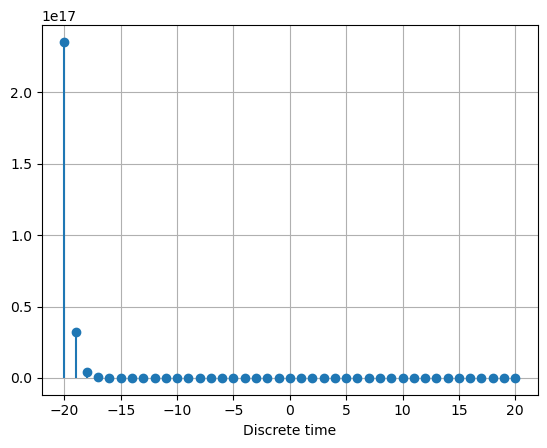

In [4]:
xn.subs({'a': '2'}).plot()

In [5]:
Xz = xn.ZT()
Xz

     a  
  z⋅ℯ   
────────
   a    
z⋅ℯ  - 1

<Axes: xlabel='Re(z)', ylabel='Im(z)'>

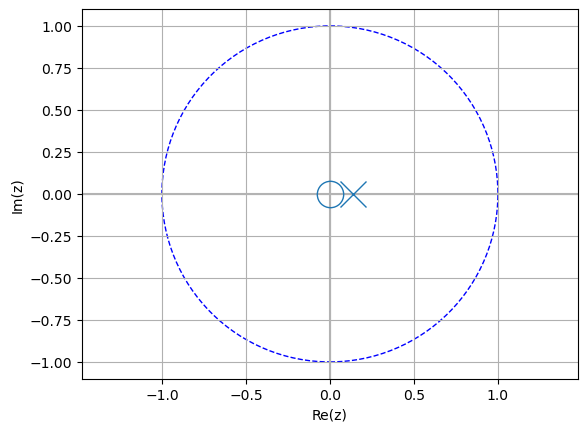

In [6]:
Xz = xn.subs({'a': '2'}).ZT()
Xz.plot()

In [7]:
exp = lc.exp
functions = [n,
             exp(-a*n),
             n*exp(-a*n),
             n**2*exp(-a*n),
             1-exp(-a*n),
             (exp(j*n)+exp(-j*n))/2, # cos(n)
             (exp(j*n)-exp(-j*n))/(2j), # sin(n)
             ]
functions

⎡                                         ⅉ⋅n    -ⅉ⋅n     ⎛ ⅉ⋅n    -ⅉ⋅n⎞ ⎤
⎢    -a⋅n     -a⋅n   2  -a⋅n       -a⋅n  ℯ      ℯ      -ⅉ⋅⎝ℯ    - ℯ    ⎠ ⎥
⎢n, ℯ    , n⋅ℯ    , n ⋅ℯ    , 1 - ℯ    , ──── + ─────, ──────────────────⎥
⎣                                         2       2            2         ⎦

In [8]:
Xz = [xn.ZT() for xn in functions]
Xz

⎡                                                                              ↪
⎢                                                                              ↪
⎢                                                                              ↪
⎢               a          a        ⎛   a    ⎞  a         a                    ↪
⎢   z        z⋅ℯ        z⋅ℯ       z⋅⎝z⋅ℯ  + 1⎠⋅ℯ       z⋅ℯ        1        z⋅ℯ ↪
⎢────────, ────────, ───────────, ───────────────, - ──────── + ─────, ─────── ↪
⎢       2     a                2              3         a           1    ⎛   ⅉ ↪
⎢(z - 1)   z⋅ℯ  - 1  ⎛   a    ⎞     ⎛   a    ⎞       z⋅ℯ  - 1   1 - ─  2⋅⎝z⋅ℯ  ↪
⎣                    ⎝z⋅ℯ  - 1⎠     ⎝z⋅ℯ  - 1⎠                      z          ↪

↪                        ⎛       ⅉ           ⎞ ⎤
↪                        ⎜    z⋅ℯ        z   ⎟ ⎥
↪                     -ⅉ⋅⎜- ──────── + ──────⎟ ⎥
↪ ⅉ                      ⎜     ⅉ            ⅉ⎟ ⎥
↪             z          ⎝  z⋅ℯ  - 1   z - ℯ ⎠ ⎥
↪ ───── + ──────────, ───

In [9]:
Xz = (z**2)/(z**2-1.5*z+0.5)
Xz

      2     
     z      
────────────
 2   3⋅z   1
z  - ─── + ─
      2    2

In [10]:
Xz.apart(z)

       1        2  
1 - ─────── + ─────
    2⋅z - 1   z - 1

In [11]:
Xz.apart(z).IZT()

                       -n           
2⋅δ[n] + 2⋅u[n - 1] - 2    for n ≥ 0